<a href="https://colab.research.google.com/github/wmtechti/analise-ambiental-geocar-ro/blob/main/RO_01_CAR_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sicar - Sistema Nacional de Cadastro Ambiental Rural

* Criado pela Lei nº 12.651/2012, no âmbito do Sistema Nacional de Informação sobre Meio Ambiente - SINIMA, e regulamentado pela Instrução Normativa MMA nº 2, de 5 de maio de 2014, o Cadastro Ambiental Rural – CAR é um registro público eletrônico de âmbito nacional, obrigatório para todos os imóveis rurais, com a finalidade de integrar as informações ambientais das propriedades e posses rurais referentes às Áreas de Preservação Permanente - APP, de uso restrito, de Reserva Legal, de remanescentes de florestas e demais formas de vegetação nativa, e das áreas consolidadas, compondo base de dados para controle, monitoramento, planejamento ambiental e econômico e combate ao desmatamento.

* A inscrição no CAR é obrigatória para todos os imóveis rurais do país, constitui-se no primeiro passo para a regularização ambiental e dá acesso a benefícios previstos no Código Florestal (Lei nº 12.651/2012).

Baixar dados em [https://www.car.gov.br/publico/imoveis/index](https://www.car.gov.br/publico/imoveis/index)

Download bases CAR e análises estatísticas


Fonte [SICAR](https://github.com/urbanogilson/SICAR)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##instalação das bases
!pip install git+https://github.com/urbanogilson/SICAR -q
!sudo apt install tesseract-ocr -y

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
##Instalação de bases para mapas
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 13.9 MB/s eta 0:00:00


In [4]:
##importando bibliotecas
from SICAR import Sicar,Polygon,State # importar submódulos
from SICAR.drivers import Tesseract # driver usado para reconhece captchas
import pprint # print e visualização dos dados
import geopandas as gpd # manipulação de dados vetoriais
import pandas as pd # manipular dataframes
import matplotlib.pyplot as plt # plotar os mapas
import os # manipular pastas
import zipfile
import folium # gerar mapas interativos
import glob
import zipfile
import shutil
import os


In [5]:
# Create Sicar instance using Tesseract OCR
car = Sicar(driver=Tesseract)

In [ ]:
help(State)

Help on class State in module SICAR.state:

class State(builtins.str, enum.Enum)
 |  State(value, names=None, *, module=None, qualname=None, type=None, start=1, boundary=None)
 |  
 |  Enumeration representing states in Brazil.
 |  
 |  Options:
 |      - AC: Acre
 |      - AL: Alagoas
 |      - AM: Amazonas
 |      - AP: Amapá
 |      - BA: Bahia
 |      - CE: Ceará
 |      - DF: Distrito Federal
 |      - ES: Espírito Santo
 |      - GO: Goiás
 |      - MA: Maranhão
 |      - MG: Minas Gerais
 |      - MS: Mato Grosso do Sul
 |      - MT: Mato Grosso
 |      - PA: Pará
 |      - PB: Paraíba
 |      - PE: Pernambuco
 |      - PI: Piauí
 |      - PR: Paraná
 |      - RJ: Rio de Janeiro
 |      - RN: Rio Grande do Norte
 |      - RO: Rondônia
 |      - RR: Roraima
 |      - RS: Rio Grande do Sul
 |      - SC: Santa Catarina
 |      - SE: Sergipe
 |      - SP: São Paulo
 |      - TO: Tocantins
 |  
 |  Method resolution order:
 |      State
 |      builtins.str
 |      enum.Enum
 |      

In [ ]:
help(Polygon)

Help on class Polygon in module SICAR.polygon:

class Polygon(builtins.str, enum.Enum)
 |  Polygon(value, names=None, *, module=None, qualname=None, type=None, start=1, boundary=None)
 |  
 |  Enumeration representing Sicar polygons.
 |  
 |  Options:
 |      - AREA_PROPERTY: Perímetros dos imóveis (Property perimeters)
 |      - APPS: Área de Preservação Permanente (Permanent preservation area)
 |      - NATIVE_VEGETATION: Remanescente de Vegetação Nativa (Native Vegetation Remnants)
 |      - CONSOLIDATED_AREA: Área Consolidada (Consolidated Area)
 |      - AREA_FALL: Área de Pousio (Fallow Area)
 |      - HYDROGRAPHY: Hidrografia (Hydrography)
 |      - RESTRICTED_USE: Uso Restrito (Restricted Use)
 |      - ADMINISTRATIVE_SERVICE: Servidão Administrativa (Administrative Servitude)
 |      - LEGAL_RESERVE: Reserva Legal (Legal reserve)
 |  
 |  Method resolution order:
 |      Polygon
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Methods defined here:
 |  


In [ ]:
help(Sicar)

Help on class Sicar in module SICAR.sicar:

class Sicar(SICAR.url.Url)
 |  Sicar(driver: SICAR.drivers.captcha.Captcha = <class 'SICAR.drivers.tesseract.Tesseract'>, headers: Dict = None)
 |  
 |  Class representing the Sicar system.
 |  
 |  Sicar is a system for managing environmental rural properties in Brazil.
 |  
 |  It inherits from the Url class to provide access to URLs related to the Sicar system.
 |  
 |  Attributes:
 |      _driver (Captcha): The driver used for handling captchas. Default is Tesseract.
 |  
 |  Method resolution order:
 |      Sicar
 |      SICAR.url.Url
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, driver: SICAR.drivers.captcha.Captcha = <class 'SICAR.drivers.tesseract.Tesseract'>, headers: Dict = None)
 |      Initialize an instance of the Sicar class.
 |      
 |      Parameters:
 |          driver (Captcha): The driver used for handling captchas. Default is Tesseract.
 |          headers (Dict): Additional headers for HT

## Download por Estado

o contexto é parecido, contudo, aqui, nós vamos baixar as bases por Estado, extrair dos zips, e depois unir em um único arquivo.

Vamos lá?

In [ ]:
# Faça o download das classes do polígonos dentro do car por estado
car.download_state(State.SP, Polygon.LEGAL_RESERVE, folder='drive/MyDrive/SICAR')

# car.download_state(State.SP, Polygon.APPS, folder='drive/MyDrive/SICAR')

car.download_state(State.SP, Polygon.AREA_PROPERTY, folder='drive/MyDrive/SICAR')

# car.download_state(State.SP, Polygon.NATIVE_VEGETATION, folder='drive/MyDrive/SICAR')


PosixPath('drive/MyDrive/SICAR/SP_AREA_IMOVEL.zip')

In [6]:
# Verifique os arquivos contidos no repositório
caminho_repositorio = "/content/drive/MyDrive/SICAR/*.zip"  # Substitua pelo caminho do seu repositório

arquivos_zip = glob.glob(caminho_repositorio)
arquivos_zip

['/content/drive/MyDrive/SICAR/SP_RESERVA_LEGAL.zip',
 '/content/drive/MyDrive/SICAR/SP_AREA_IMOVEL.zip']

In [ ]:
##Extrair os arquivos zip e salvar com o código do município
for arquivo_zip in arquivos_zip:
    nome_arquivo_zip = os.path.basename(arquivo_zip)
    nome_arquivo_extraido = nome_arquivo_zip.split(".")[0]  # Extrai a parte desejada do nome do arquivo ZIP

    try:
        with zipfile.ZipFile(arquivo_zip, 'r') as zip_ref:
            zip_ref.extractall("/content/drive/MyDrive/SICAR/shapefiles/" + nome_arquivo_extraido)  # Substitua pelo caminho do diretório de destino para a extração
    except zipfile.BadZipFile:
        print(f"O arquivo {arquivo_zip} não é um arquivo ZIP válido. Ignorando...")

In [7]:
# Acessando bases que foram baixadas
repositorio = "/content/drive/MyDrive/SICAR/shapefiles/*"  # Substitua pelo caminho do seu repositório
pastas = glob.glob(repositorio)
pastas

['/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL',
 '/content/drive/MyDrive/SICAR/shapefiles/SP_AREA_IMOVEL']

In [8]:
# Vamos localizar os registros de reserva legal com status pendente pa
caminho_pasta = '/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL'
dados_shp = gpd.read_file(caminho_pasta)
cars_status = dados_shp.loc[dados_shp['ind_status'] == 'PE']
cars_status

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL/RESERVA_LEGAL_1.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


cod_tema                nom_tema  \
142     ARL_PROPOSTA  Reserva Legal Proposta   
773     ARL_PROPOSTA  Reserva Legal Proposta   
1667    ARL_PROPOSTA  Reserva Legal Proposta   
1903    ARL_PROPOSTA  Reserva Legal Proposta   
2186    ARL_PROPOSTA  Reserva Legal Proposta   
...              ...                     ...   
363926  ARL_PROPOSTA  Reserva Legal Proposta   
363927  ARL_PROPOSTA  Reserva Legal Proposta   
363951  ARL_PROPOSTA  Reserva Legal Proposta   
364187  ARL_PROPOSTA  Reserva Legal Proposta   
364324  ARL_PROPOSTA  Reserva Legal Proposta   

                                         cod_imovel  num_area ind_status  \
142     SP-3514106-6884528C34F84770BF9FD68A06AEAE0A    0.0584         PE   
773     SP-3517505-5314D10E66C840F6AFD4161F4A899D3F    2.5574         PE   
1667    SP-3520004-AFE0D88A7A7F4A2C999D2369FE8D4A9E    0.2003         PE   
1903    SP-3514502-779392A563734AD8B473309EBD7F6D5E    0.8464         PE   
2186    SP-3528601-957BBFE1461B4301A1F9D5C5760C1B51    0.9798         PE   
...                                             ...       ...        ...   
363926  SP-3519253-60DFC75AADF94F369282BA5550CC0FFA    0.0830         PE   
363927  SP-3519253-60DFC75AADF94F369282BA5550CC0FFA    0.0270         PE   
363951  SP-3500907-2EFBEF864B954B599510BEBC3EB0395E    0.8931         PE   
364187  SP-3512308-4B973BDFDE084147B0E630033475C3ED    4.9235         PE   
364324  SP-3514809-817E4BFB2728437087DA86D24D4704D2  207.1745         PE   

                                               des_condic  \
142       Analisado, aguardando atendimento a notificacao   
773       Analisado, aguardando atendimento a notificacao   
1667      Analisado, aguardando atendimento a notificacao   
1903      Analisado, aguardando atendimento a notificacao   
2186      Analisado, aguardando atendimento a notificacao   
...                                                   ...   
363926    Analisado, aguardando atendimento a notificacao   
363927    Analisado, aguardando atendimento a notificacao   
363951    Analisado, aguardando atendimento a notificacao   
364187    Analisado, aguardando atendimento a notificacao   
364324  Analisado, em conformidade com a Lei n 12.651/...   

                                                 geometry  
142     POLYGON ((-48.35237 -22.27769, -48.35233 -22.2...  
773     MULTIPOLYGON (((-49.24769 -20.71401, -49.24745...  
1667    POLYGON ((-48.57177 -22.50404, -48.57195 -22.5...  
1903    POLYGON ((-49.45401 -22.38967, -49.4546 -22.38...  
2186    POLYGON ((-49.31346 -22.99046, -49.31253 -22.9...  
...                                                   ...  
363926  POLYGON ((-49.16975 -22.86057, -49.16974 -22.8...  
363927  POLYGON ((-49.16934 -22.86171, -49.16937 -22.8...  
363951  POLYGON ((-49.05913 -20.50599, -49.05914 -20.5...  
364187  MULTIPOLYGON (((-48.03926 -23.00969, -48.03915...  
364324  MULTIPOLYGON (((-48.23601 -24.53573, -48.23333...  

[3911 rows x 7 columns]

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL/RESERVA_LEGAL_1.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


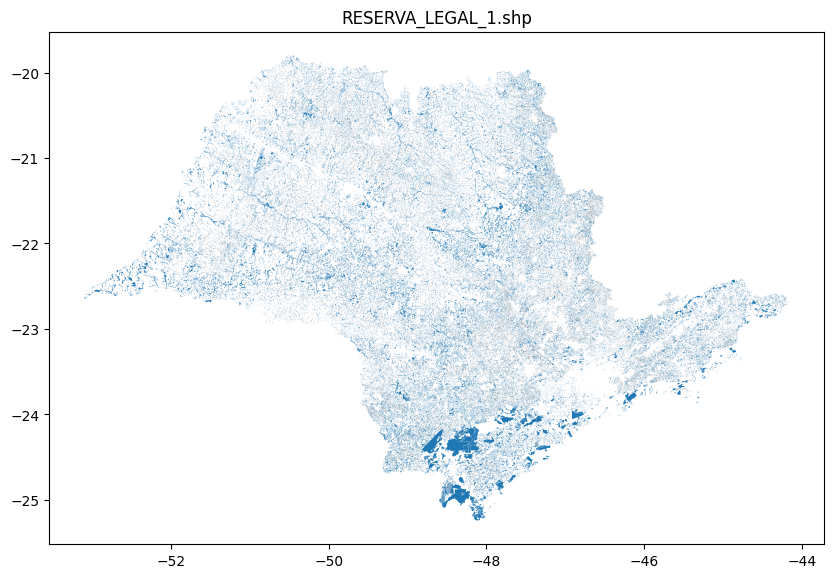

In [9]:
# Define o caminho da pasta contendo os arquivos shp
caminho_pasta = '/content/drive/MyDrive/SICAR/shapefiles/SP_RESERVA_LEGAL'

# Lista os arquivos shp na pasta
arquivos_shp = [arquivo for arquivo in os.listdir(caminho_pasta) if arquivo.endswith('.shp')]

# Percorre cada arquivo shp e plota separadamente
for arquivo_shp in arquivos_shp:
    # Lê o arquivo shp com o Geopandas
    caminho_arquivo = os.path.join(caminho_pasta, arquivo_shp)
    dados_shp = gpd.read_file(caminho_arquivo)

    # Cria uma nova figura
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plota os dados
    ax.set_title(arquivo_shp)
    dados_shp.plot(ax=ax)

    # Exibe o gráfico
    plt.show()

In [10]:
# Visualize os cincos primeiros registros
dados_shp.head()

cod_tema                nom_tema  \
0  ARL_PROPOSTA  Reserva Legal Proposta   
1  ARL_PROPOSTA  Reserva Legal Proposta   
2  ARL_PROPOSTA  Reserva Legal Proposta   
3  ARL_PROPOSTA  Reserva Legal Proposta   
4  ARL_PROPOSTA  Reserva Legal Proposta   

                                    cod_imovel  num_area ind_status  \
0  SP-3522406-4CF939E95A78465AACFABF2A53559719    4.3290         AT   
1  SP-3512902-4D425D61F75440F3B8CA4BC1810B5AD5    2.5737         AT   
2  SP-3512803-34CA631660014B6B9B742552714D51D2    0.6452         AT   
3  SP-3554003-787AD0658AA14CE1903ED5E9A4E4E800    0.6058         AT   
4  SP-3513900-B48EB0729AD542F1881D2718E322F2C3   10.9035         AT   

                                          des_condic  \
0  Aguardando analise, apos revisao ou atendiment...   
1    Analisado, aguardando atendimento a notificacao   
2                                         Em analise   
3    Analisado, aguardando atendimento a notificacao   
4                                 Aguardando analise   

                                            geometry  
0  POLYGON ((-48.87595 -23.91351, -48.87597 -23.9...  
1  MULTIPOLYGON (((-49.77579 -20.43364, -49.7758 ...  
2  POLYGON ((-47.21754 -22.589, -47.21749 -22.588...  
3  MULTIPOLYGON (((-47.78218 -23.33002, -47.78218...  
4  MULTIPOLYGON (((-46.68761 -21.62597, -46.68743...

In [11]:
dados_shp.value_counts('ind_status')

ind_status
AT    345072
CA     15539
PE      3911
SU        47
Name: count, dtype: int64

In [12]:
# Nomes das colunas
dados_shp.columns

Index(['cod_tema', 'nom_tema', 'cod_imovel', 'num_area', 'ind_status',
       'des_condic', 'geometry'],
      dtype='object')

In [13]:
# Estrutura, dimensão e tipos dos dados
dados_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 364569 entries, 0 to 364568
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   cod_tema    364569 non-null  object  
 1   nom_tema    364569 non-null  object  
 2   cod_imovel  364569 non-null  object  
 3   num_area    364569 non-null  float64 
 4   ind_status  364569 non-null  object  
 5   des_condic  364569 non-null  object  
 6   geometry    364569 non-null  geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 19.5+ MB


In [14]:
# Sistema de referência de coordenadas
dados_shp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
# Contagem de ID únicos
cod_imovel = dados_shp['cod_imovel'].nunique()
cod_imovel

237659

In [16]:
# Estatísticas descritivas da área em hectares do tema selecionado (nesse caso, reserva legal)
num_area = dados_shp['num_area']
num_area.describe()

count    364569.000000
mean         11.933143
std         545.375961
min           0.000000
25%           0.436500
50%           1.473600
75%           4.967200
max      200268.906200
Name: num_area, dtype: float64

In [17]:
# ##Juntando os SHP
# ##Caso esteja trabalhando com mais de uma estado... estas linhas vão unir os dados de app dos estados

# # Define o caminho da pasta contendo os arquivos shp
# caminho_pasta = '/content/drive/MyDrive/SICAR/'

# # Lista os arquivos shp na pasta
# arquivos_shp = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if arquivo.endswith('.shp')]

# # Realiza o join dos arquivos Shapefile
# gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in arquivos_shp], ignore_index=True),
#                        crs=gpd.read_file(arquivos_shp[0]).crs)

# # Define o caminho do arquivo de saída
# caminho_saida = '/content/drive/MyDrive/SICAR/RESERVA_LEGAL_join'

# # Salva o GeoDataFrame concatenado como um arquivo Shapefile
# gdf.to_file(caminho_saida, driver='ESRI Shapefile')

# # Analisando resultado
# RESERVA_LEGAL_join = gpd.read_file('/content/drive/MyDrive/SICAR/RESERVA_LEGAL_join.shp')
# RESERVA_LEGAL_join

In [ ]:
# # Criar um plot do GeoDataFrame com cores baseadas na coluna des_condic
# fig, ax = plt.subplots(figsize=(12, 8))
# dados_shp.plot(column='des_condic', cmap='viridis', ax=ax, legend=False)

# # Definir título e rótulo do eixo x
# ax.set_title('Condição em que o cadastro se encontra no fluxo de análise pelo órgão competente.')
# ax.set_xlabel('Longitude')

# # Mostrar o plot
# plt.show()

In [18]:
from folium.plugins import MarkerCluster

# Carregar dados shapefile
cars_status

# Simplificar geometria para reduzir o consumo de memória
cars_status['geometry'] = cars_status['geometry'].simplify(tolerance=0.001)

# Preenchendo centróide com lat e long
centroids = cars_status.geometry.centroid

# Calcula a média das coordenadas x e y dos centróides
mean_x = centroids.x.mean()
mean_y = centroids.y.mean()

# Cria um mapa base
m = folium.Map(location=[mean_y, mean_x], zoom_start=13)

# Adicionando GeoDataFrame ao mapa usando folium.GeoJson
geojson = folium.GeoJson(
    cars_status,
    name="ind_status",
    style_function=lambda feature: {
        'fillColor': 'blue',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(fields=['ind_status'], aliases=['Status'])
).add_to(m)

# Adiciona uma camada de satélite do Google
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=False,
    control=True
).add_to(m)

# Adiciona o controle de camadas
folium.LayerControl().add_to(m)

# Exibir o mapa
m


/tmp/ipython-input-18-757378307.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = cars_status.geometry.centroid


In [19]:
m.save('test.html')